## Creating a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling The Association of Tennis Professionals (ATP) data

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [23]:
df = pd.read_csv('tennis_stats.csv')

df.head(10)

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272
5,Andres Artunedo Martinavarro,2014,0.77,0.67,0.09,0.55,0.40,3,0.50,6,...,0.10,0.26,9,0.67,0.44,0.64,0,1,10434,495
6,Eduardo Struvay,2014,0.76,0.65,0.31,0.36,0.41,1,0.29,6,...,0.20,0.35,9,0.56,0.45,0.58,0,1,24218,1107
7,Riccardo Bellotti,2017,0.76,0.55,0.35,0.39,0.41,0,0.50,9,...,0.31,0.37,14,0.57,0.45,0.51,0,1,61154,432
8,Austin Krajicek,2017,0.76,0.78,0.16,0.57,0.49,9,0.25,3,...,0.06,0.30,16,0.88,0.50,0.73,0,1,52940,291
9,Guilherme Clezar,2011,0.76,0.56,0.24,0.46,0.13,3,0.00,5,...,0.00,0.21,8,0.63,0.38,0.54,0,1,18829,241


## Conducting exploratory analysis on quantitative variables 

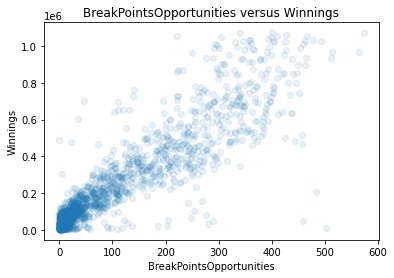

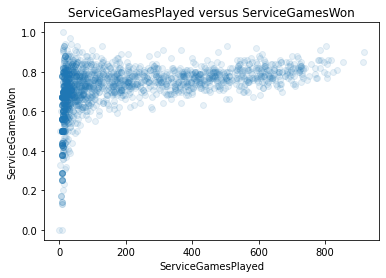

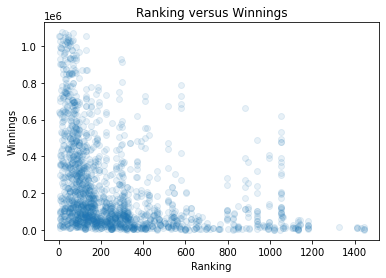

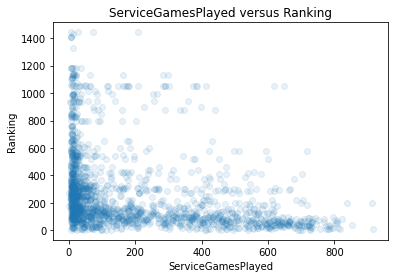

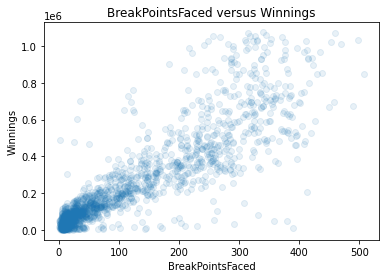

<Figure size 432x288 with 0 Axes>

In [12]:
def plot_scatter(x_col, y_col):
  plt.scatter(df[x_col], df[y_col], alpha=0.1)
  plt.title(str(x_col) + ' versus ' + str(y_col))
  plt.xlabel(x_col)
  plt.ylabel(y_col)
  plt.show()
  plt.clf()

plot_scatter('BreakPointsOpportunities', 'Winnings')
plot_scatter('ServiceGamesPlayed', 'ServiceGamesWon')
plot_scatter('Ranking', 'Winnings')
plot_scatter('ServiceGamesPlayed', 'Ranking')
plot_scatter('BreakPointsFaced', 'Winnings')

## Using First serve return points won to predict winnings

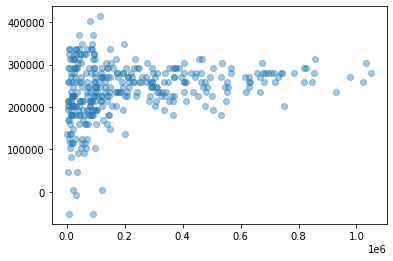

<Figure size 432x288 with 0 Axes>

In [13]:
features = df[['FirstServeReturnPointsWon']]
outcome = df[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

model = LinearRegression()
model.fit(features_train, outcome_train)

model.score(features_test, outcome_test)

prediction = model.predict(features_test)
plt.scatter(outcome_test, prediction, alpha=0.4)
plt.show()
plt.clf()

## Using Break point opportunities to as the feature to predict winnings 

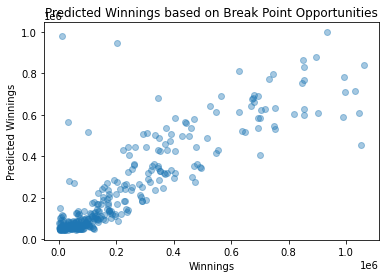

<Figure size 432x288 with 0 Axes>

In [14]:
feature = df[['BreakPointsOpportunities']]
outcome = df[['Winnings']]

feature_train, feature_test, outcome_train, outcome_test = train_test_split(feature, outcome, train_size = 0.8)
'''
'''
model = LinearRegression()
model.fit(feature_train, outcome_train)
model.score(feature_test, outcome_test)
predicted_winnings = model.predict(feature_test)
plt.scatter(outcome_test, predicted_winnings, alpha=0.4)
plt.title('Predicted Winnings based on Break Point Opportunities')
plt.xlabel('Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

## Creating a linear regression model that uses multiple features 

In [18]:
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
winnings = df[['Winnings']]

features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)



model = LinearRegression()

model.fit(features_train, winnings_train)

print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test,winnings_test))

Predicting Winnings with Multiple Features Test Score: 0.8619368167898395


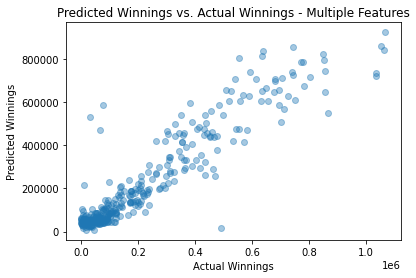

In [19]:
winnings_prediction = model.predict(features_test)
plt.scatter(winnings_test, winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

## Predicting winnings for myself ;)

In [20]:
alastair_stats = np.array([1, 1, 0.2, 0.8, 1, 8, 0.4, 8, 12, 0.6, 1, 2, 99, 0.99, 55, 1, 1, 1]).reshape(1, -1)

alastair_winnings = model.predict(alastair_stats)
print('Alastair is predicted to win ', alastair_winnings)

Alastair is predicted to win  [[7507425.40030771]]
